In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from scipy.io import loadmat
import numpy as np
import operator

In [3]:
metadata = loadmat('data/imdb/imdb.mat')
metadata = metadata['imdb'][0, 0]

In [4]:
paths = metadata['full_path']
gender = metadata['gender']
is_single_person = np.isnan(metadata['second_face_score'])

In [5]:
# Unwrap objects
paths = np.array(list(map(operator.itemgetter(0), paths[0])))
gender = gender[0]
is_single_person = is_single_person[0]

In [6]:
paths = paths[is_single_person]
gender = gender[is_single_person]

In [7]:
idxs = paths.argsort()
paths = paths[idxs]
gender = gender[idxs]

In [8]:
is_nan_gender = ~np.isnan(gender)

In [9]:
paths = paths[is_nan_gender]
gender = gender[is_nan_gender]

00/nm0000100_rm1001569280_1955-1-6_2011.jpg


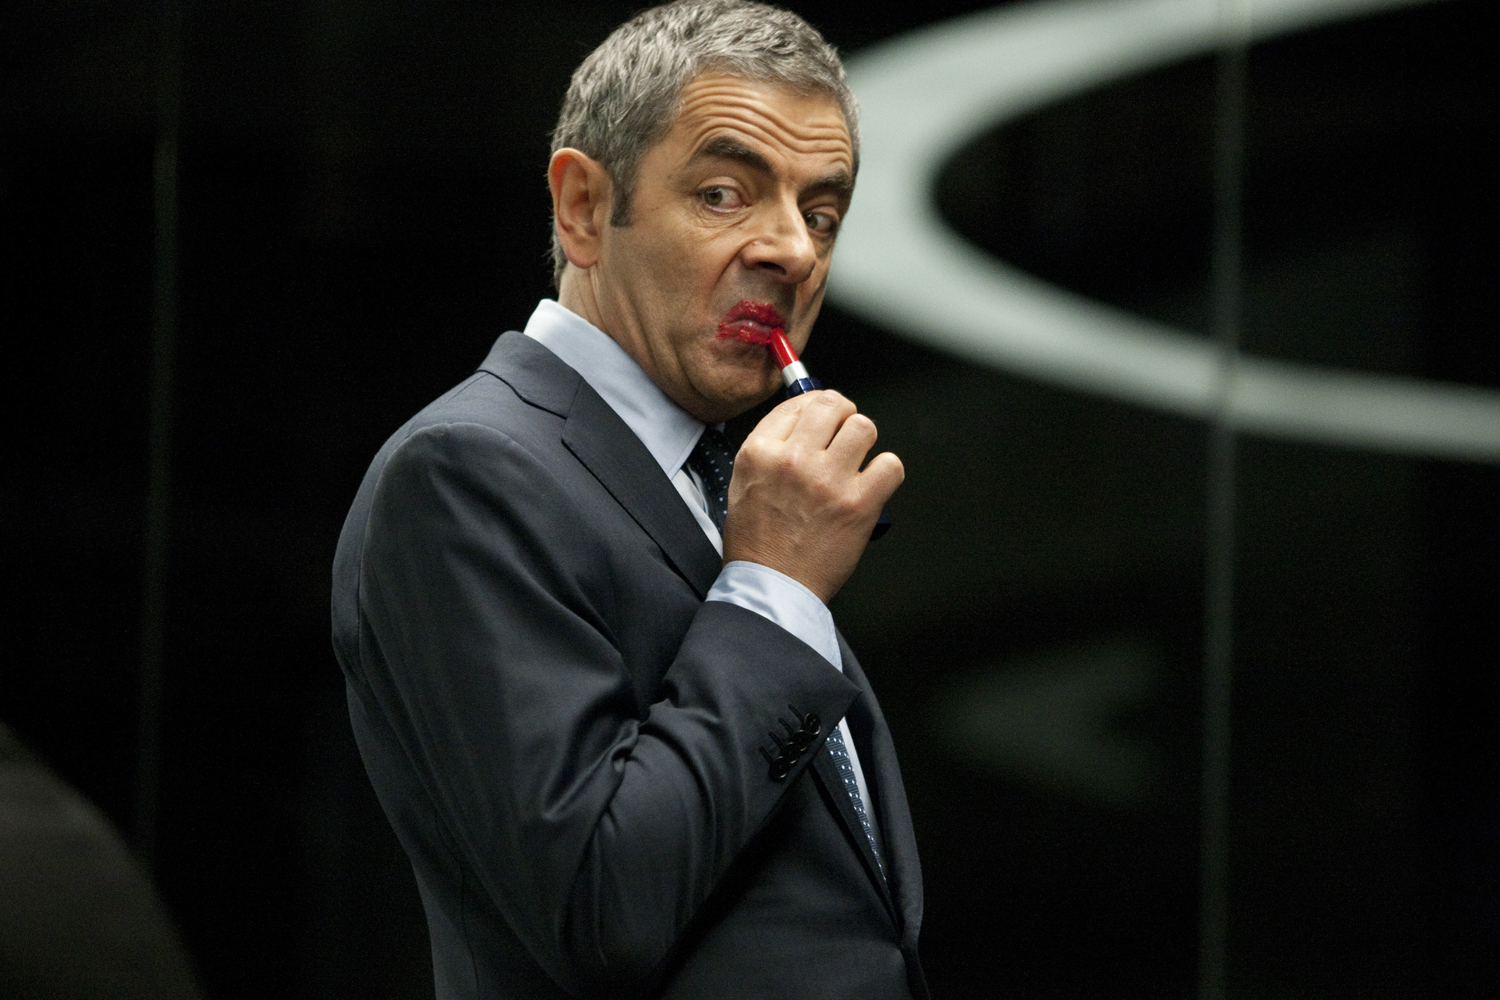

00/nm0000100_rm1002674432_1955-1-6_2003.jpg


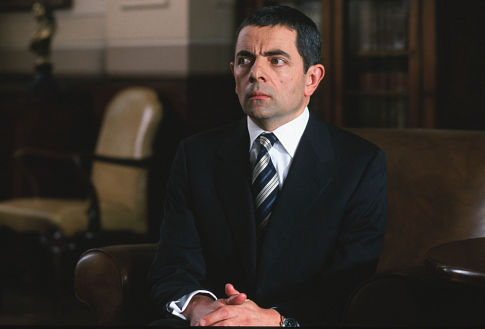

00/nm0000100_rm1018346496_1955-1-6_2011.jpg


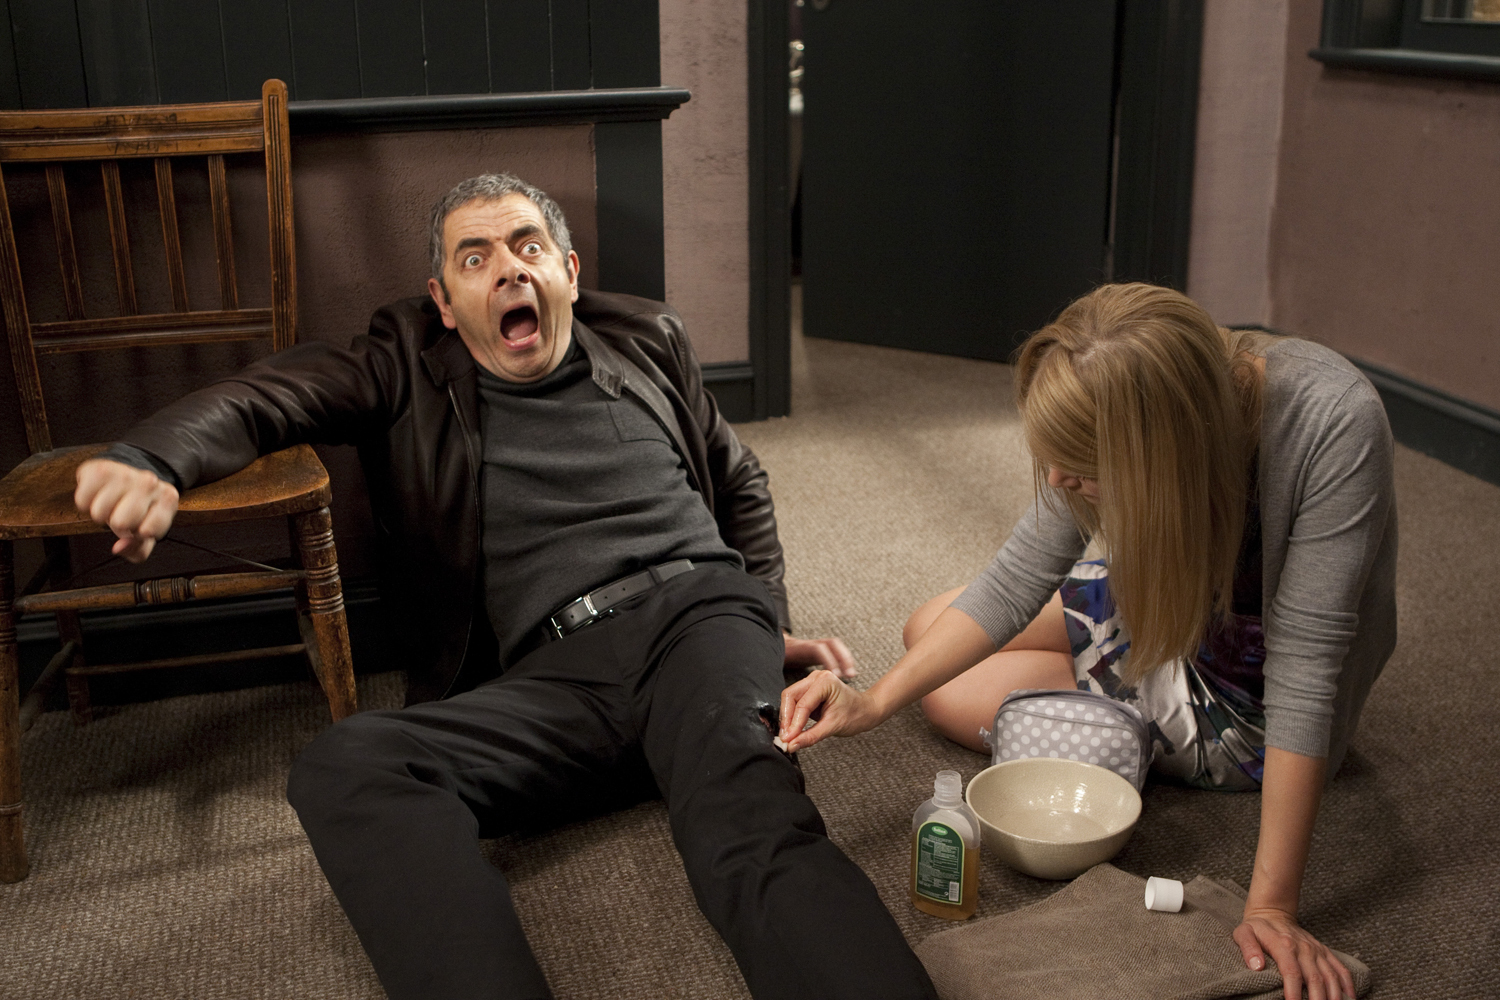

In [10]:
from IPython.display import Image, display

for path in paths[:3]:
    filepath = 'data/imdb/sample/train/' + path
    try:
        img = Image(filename=filepath, width=250, height=250)
    except:
        pass
    else:
        print(path)
        display(img)

In [11]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
paths_idxs = list(map(lambda s: s.startswith('00/nm0000100_') or s.startswith('07/nm0000107_'), paths))
paths = paths[paths_idxs]
gender = gender[paths_idxs]

In [13]:
PATH = 'data/imdb/sample/train/'

In [14]:
sz=256
arch=resnet34
o = 3
#data = ImageClassifierData.from_names_and_array(cls, path, fnames, y, classes, val_idxs=None, test_name=None,
#           num_workers=8, suffix='', tfms=(None,None), bs=64, continuous=False)
data = ImageClassifierData.from_names_and_array(PATH, paths, gender, np.array(['woman', 'man']),
                                                tfms=tfms_from_model(arch, sz), val_idxs=list(range(o)))

In [15]:
def get_augs(n):
    x, _ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[n]

data/imdb/sample/train/00/nm0000100_rm1001569280_1955-1-6_2011.jpg


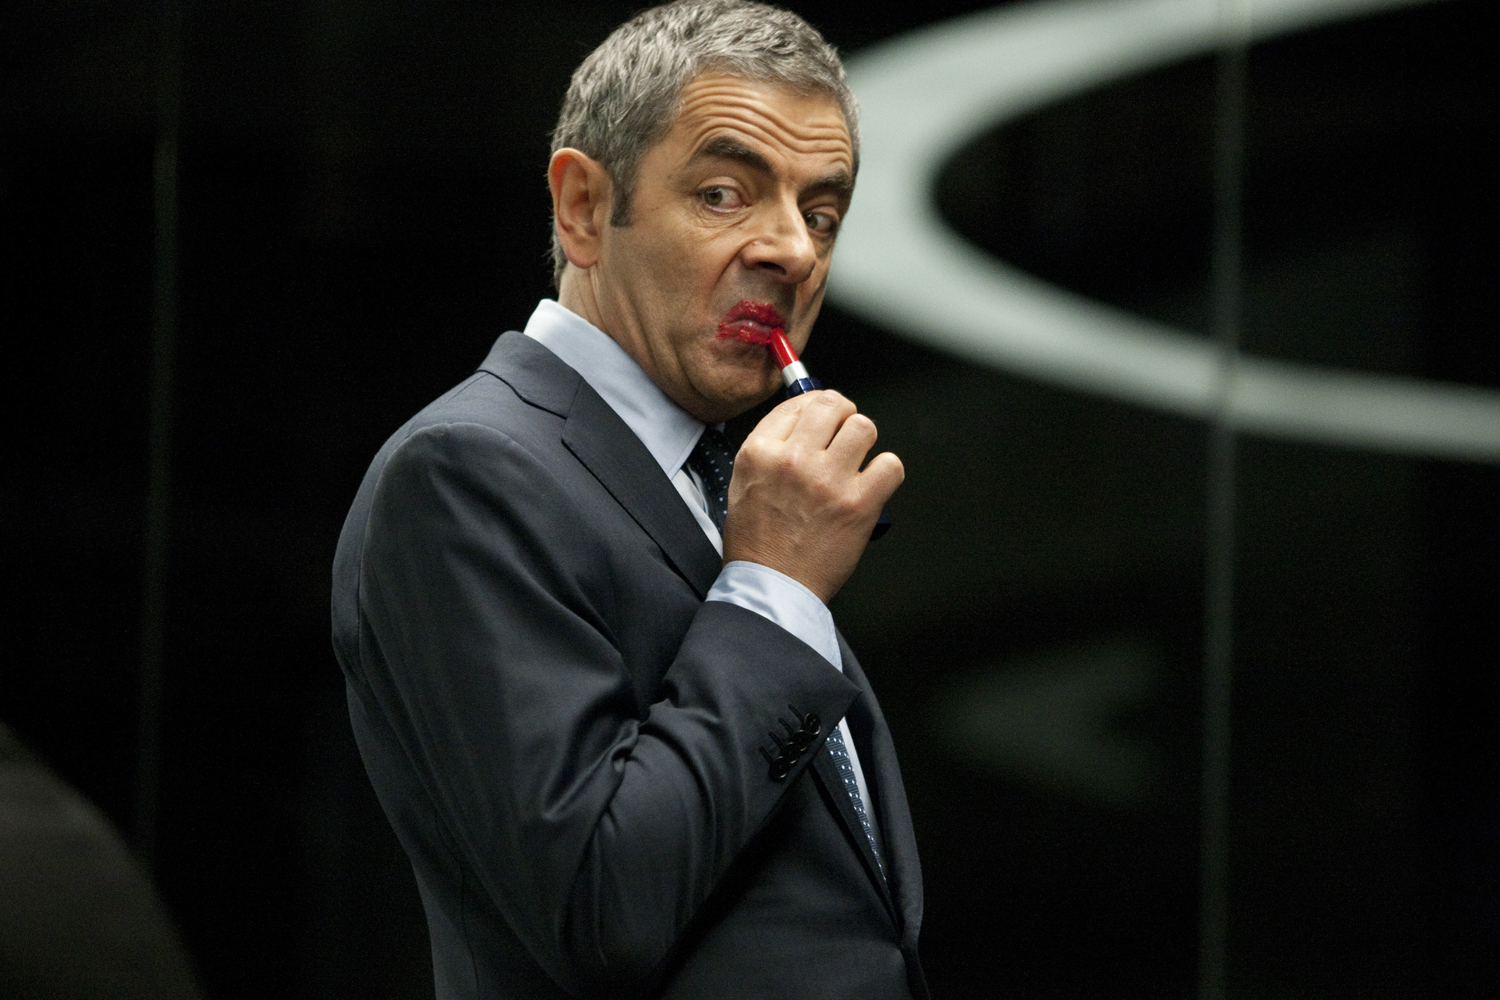

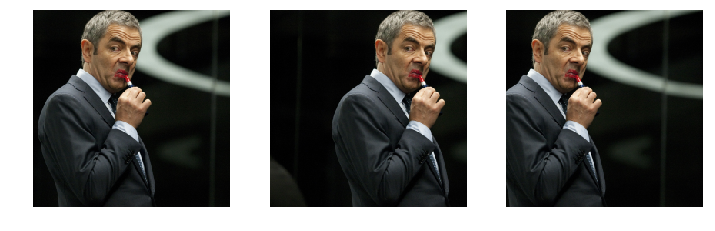

data/imdb/sample/train/00/nm0000100_rm1002674432_1955-1-6_2003.jpg


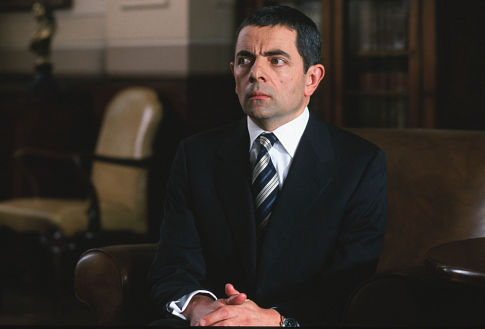

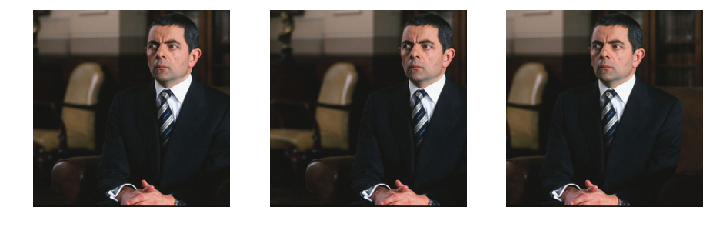

data/imdb/sample/train/00/nm0000100_rm1018346496_1955-1-6_2011.jpg


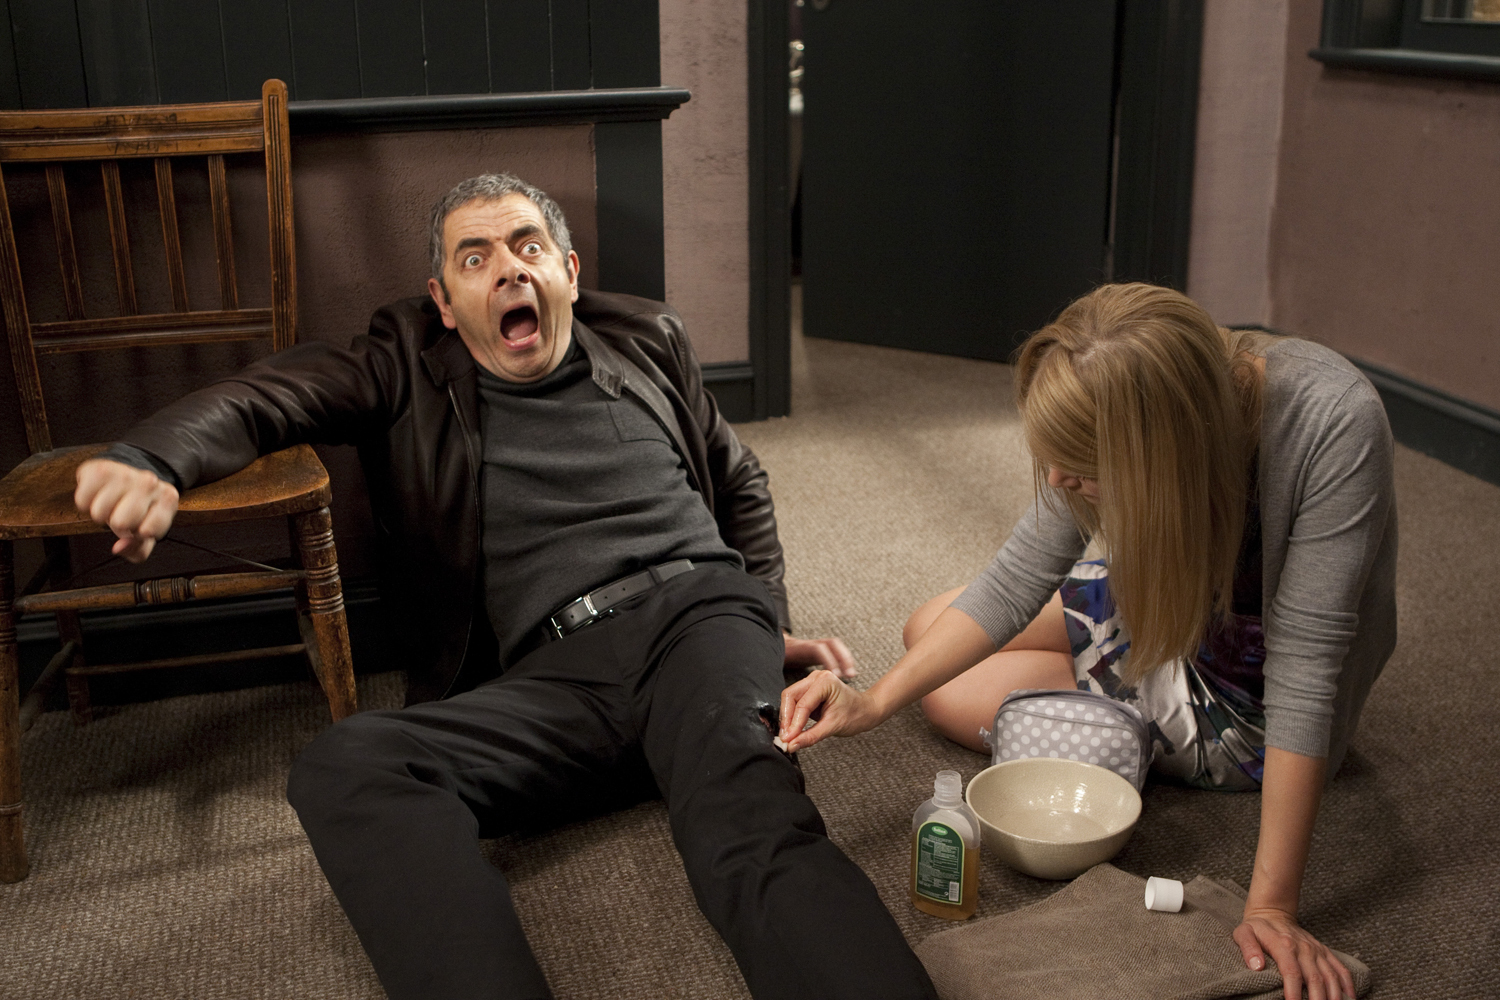

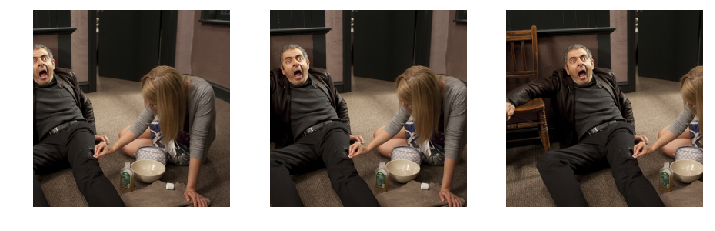

In [16]:
from IPython.display import Image, display
for j in range(o):
    p = PATH + paths[j]
    print(p)
    display(Image(filename=p, width=250, height=250))
    train_img1 = np.stack([get_augs(j) for i in range(3)])
    plots(train_img1, rows=1)
    plt.show()

In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
from scipy.io import loadmat
import numpy as np
import operator

In [19]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [20]:
metadata = loadmat('data/imdb/imdb.mat')
metadata = metadata['imdb'][0, 0]

paths = metadata['full_path']
gender = metadata['gender']
is_single_person = np.isnan(metadata['second_face_score'])

# Unwrap objects
paths = np.array(list(map(operator.itemgetter(0), paths[0])))
gender = gender[0]
is_single_person = is_single_person[0]

paths = paths[is_single_person]
gender = gender[is_single_person]

idxs = paths.argsort()
paths = paths[idxs]
gender = gender[idxs]

is_nan_gender = ~np.isnan(gender)

paths = paths[is_nan_gender]
gender = gender[is_nan_gender]

gender = np.array(list(map(int, gender)))

In [21]:
#PATH = 'data/imdb/sample/train/'
#is_train_path = lambda p: p[:13] == '00/nm0000100_'
#is_val_path = lambda p: p[:13] == '07/nm0000107_'

In [22]:
PATH = 'data/imdb/train/'
is_train_path = lambda p: p[:3] in [f'0{i}/' for i in range(6)]
is_val_path = lambda p: p[:3] in [f'0{i}/' for i in [6, 7]]

In [23]:
idxs = list(map(lambda p: is_train_path(p) or is_val_path(p), paths))
paths = paths[idxs]
gender = gender[idxs]


train_idxs = list(map(is_train_path, paths))
print(sum(train_idxs))

val_idxs = list(map(is_val_path, paths))
print(sum(val_idxs))

15519
4409


In [24]:
val_idxs = np.argwhere(val_idxs).reshape(-1)
val_idxs

array([15519, 15520, 15521, ..., 19925, 19926, 19927])

In [25]:
sz=256
bs=128
arch=resnet34
data = ImageClassifierData.from_names_and_array(PATH, paths, gender, np.array(['woman', 'man']),
                                                tfms=tfms_from_model(arch, sz), val_idxs=val_idxs, bs=bs)

In [26]:
learn = ConvLearner.pretrained(arch, data, pretrained=True)

In [27]:
learn.lr_find()

 89%|████████▉ | 109/122 [11:26<01:37,  7.52s/it, loss=2.26]

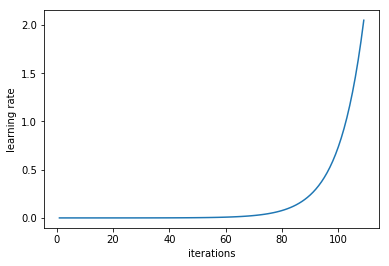

In [28]:
learn.sched.plot_lr()

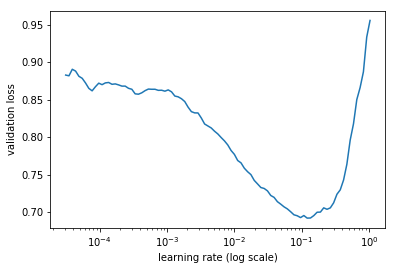

In [29]:
learn.sched.plot()

In [31]:
learn.fit(1.2e-2, 5)

epoch      trn_loss   val_loss   accuracy   
    0      0.49833    0.454352   0.777274  
    1      0.48663    0.438919   0.781583  
    2      0.463617   0.431272   0.785212  
    3      0.45115    0.43026    0.784985  
    4      0.456164   0.428809   0.786573  


[0.4288087262131779, 0.7865729187318434]

In [32]:
gender.mean()

0.5616720192693697